<h1>Task 4</h1>

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

<h2>About Dataset</h2>

The dataset is an entity-level sentiment analysis dataset sourced from Twitter. It aims to assess the sentiment of messages towards a specific entity, with sentiments classified into Positive, Negative, Neutral, or Irrelevant categories. This dataset provides valuable insights into sentiment trends and prevailing opinions within the Twitter community. Analyzing this data can help in understanding sentiment dynamics, guiding decision-making processes, and shaping effective marketing strategies and community engagement initiatives.

<h2>Importing the necessary libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<h2>Reading the Dataset</h2>

In [2]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
url = 'https://github.com/karthi-1212/PRODIGY_DS_04/raw/main/twitter_training.csv'
ds= pd.read_csv(url,names=cols)
ds.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
ds.info()#For getting the neccessary info abt the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
ds.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [5]:
ds['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

<h2>Checking for null or duplicate values in the dataset</h2>

In [6]:
ds.dropna(inplace=True);ds.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [7]:
ds.drop_duplicates(inplace=True);ds.duplicated().sum()

0

<h2>Topic Distribution Visualization</h2>

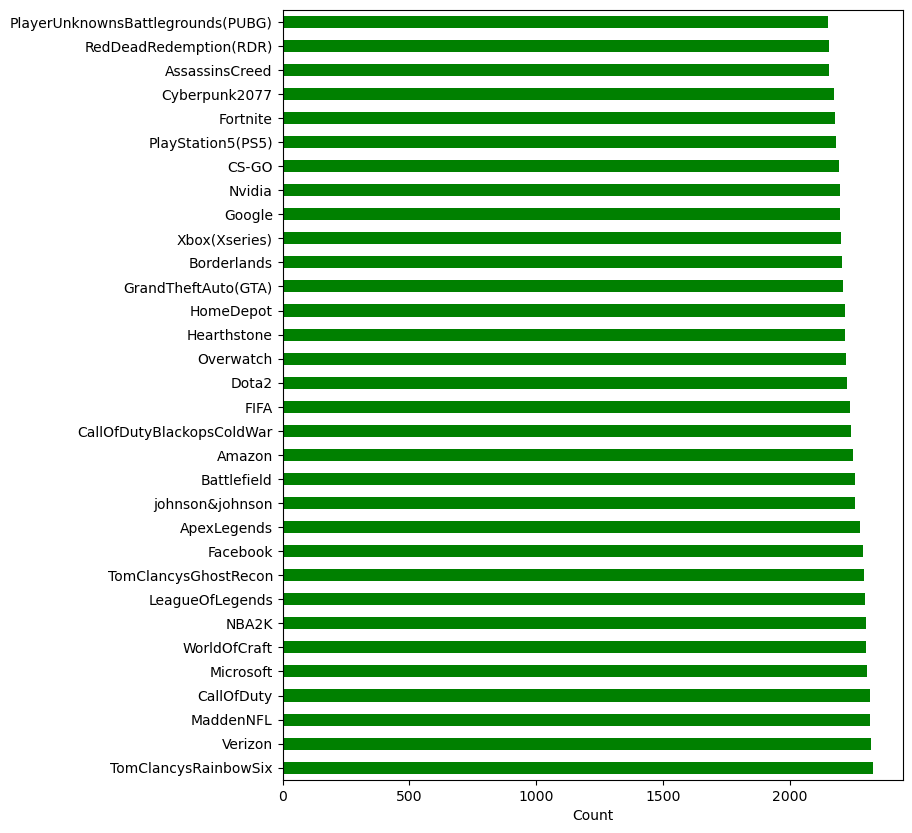

In [8]:
plt.figure(figsize=(8,10))
ds['Topic'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

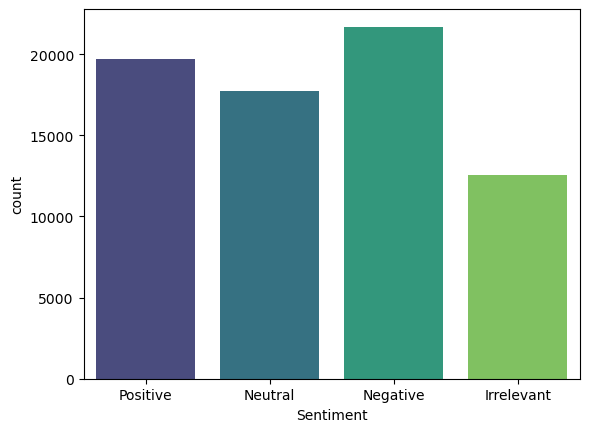

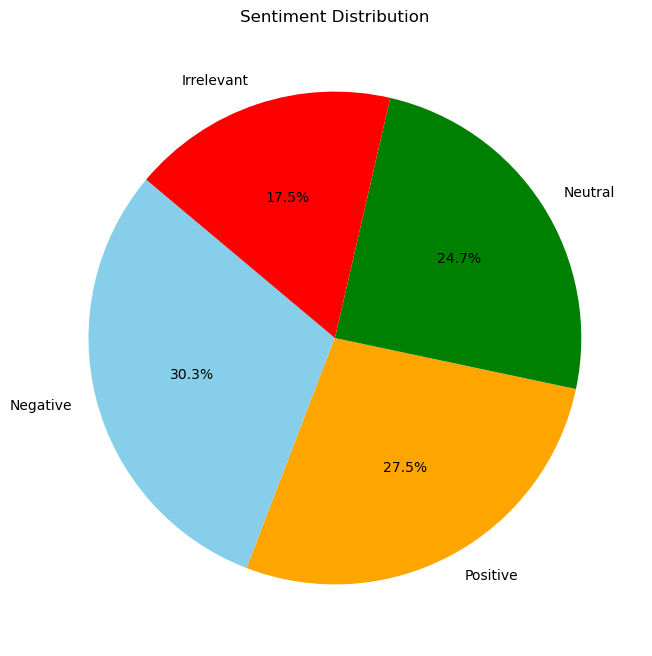

In [9]:
#Sentiment Distribution
sns.countplot(x = 'Sentiment',data=ds,palette='viridis')
plt.show()

# Calculate the counts for each sentiment
sentiment_counts = ds['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

`Observation:`
- Most topic has negative sentiment 

<h2>Sentiment Distribution Topic-wise</h2>

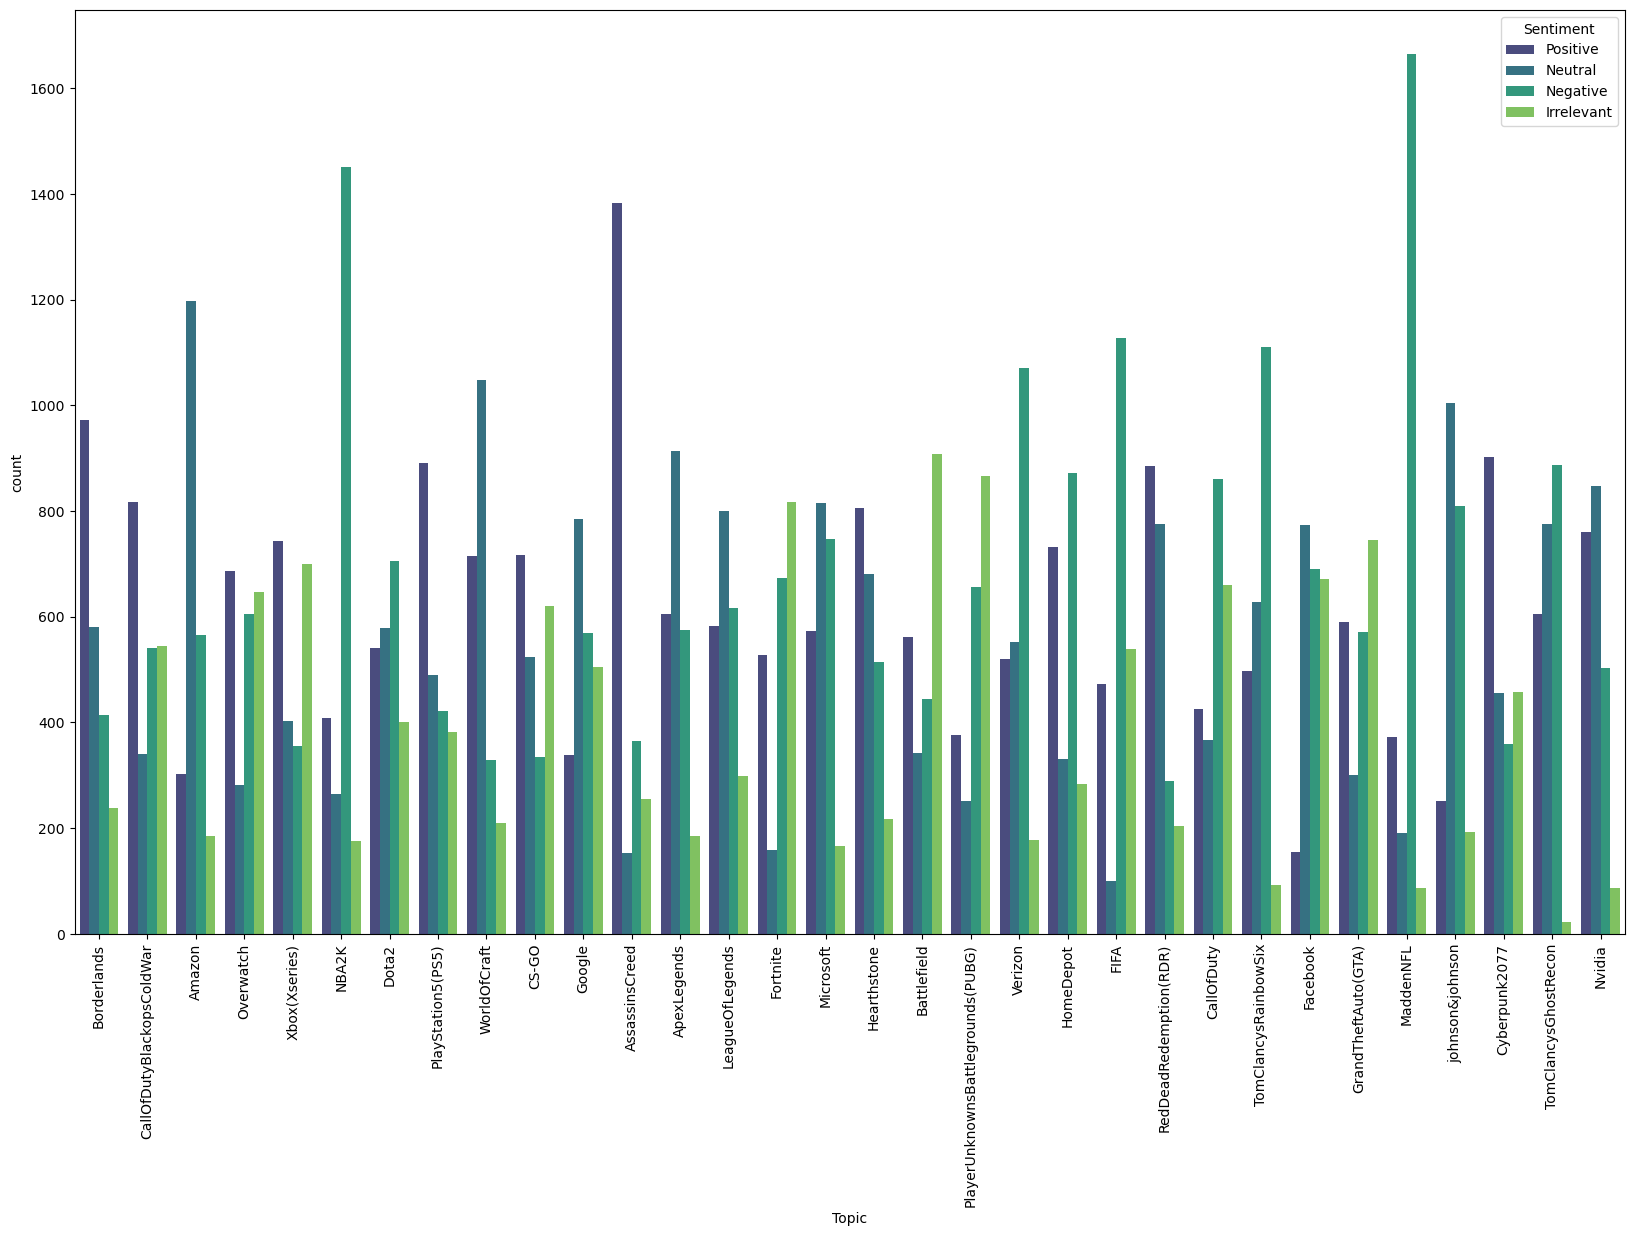

In [10]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=ds,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

## Group by Topic and Sentiment
topic_wise_sentiment = ds.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = ds['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

<h2>Top 5 Topics with Negative Sentiments</h2>

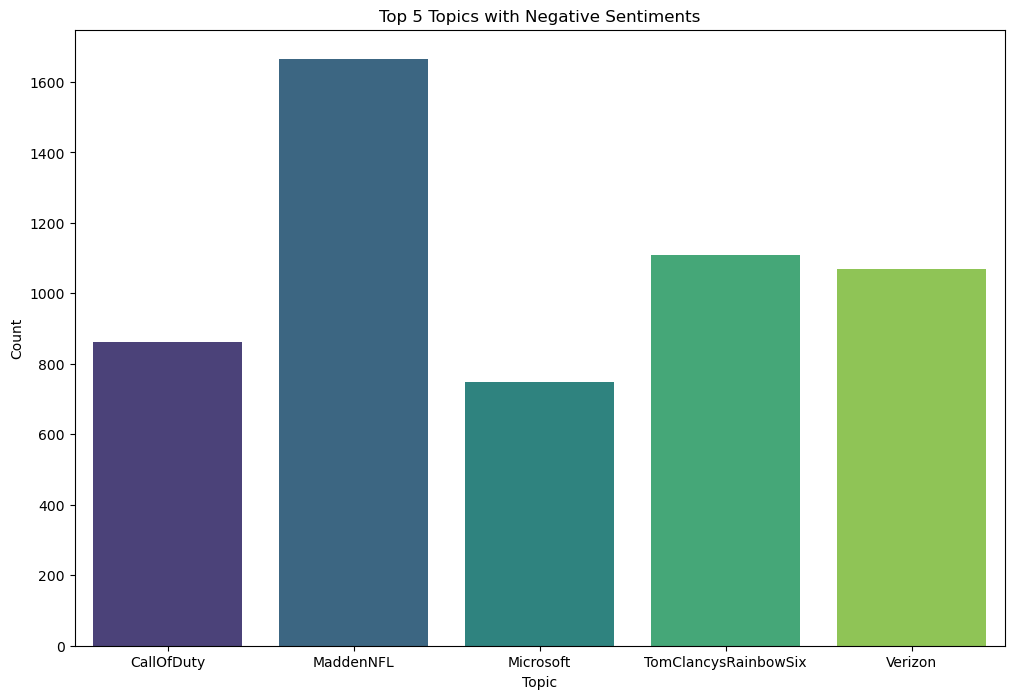

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments');plt.xlabel('Topic');plt.ylabel('Count')
plt.show()

<h2>Top 5 Topics with Positive Sentiments</h2>

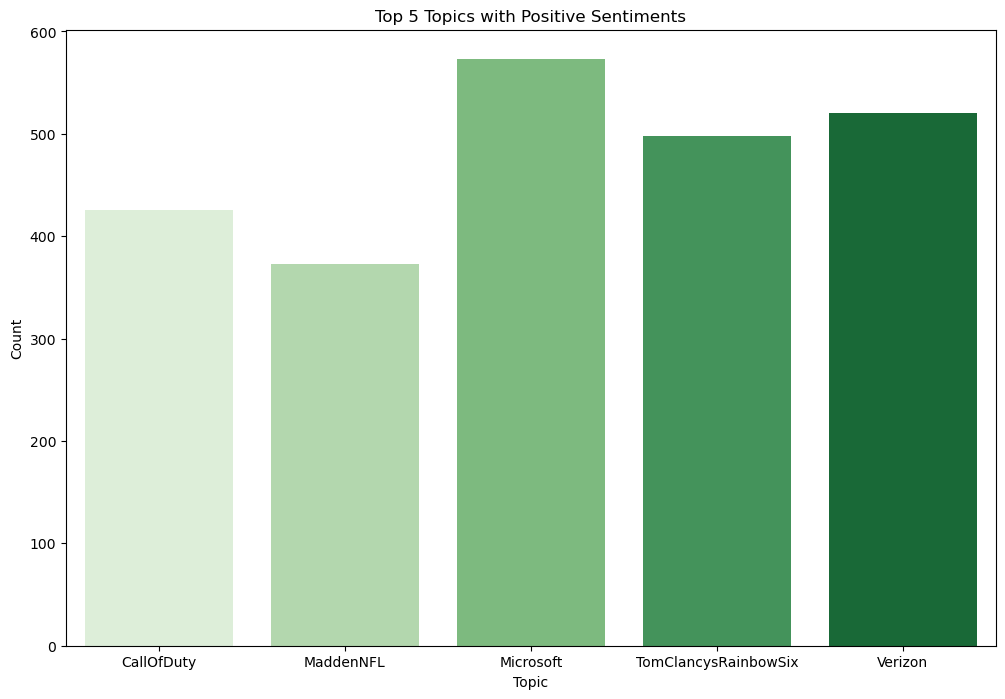

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments');plt.xlabel('Topic');plt.ylabel('Count')
plt.show()

<h2>Top 5 Topics with Neural Sentiments</h2>

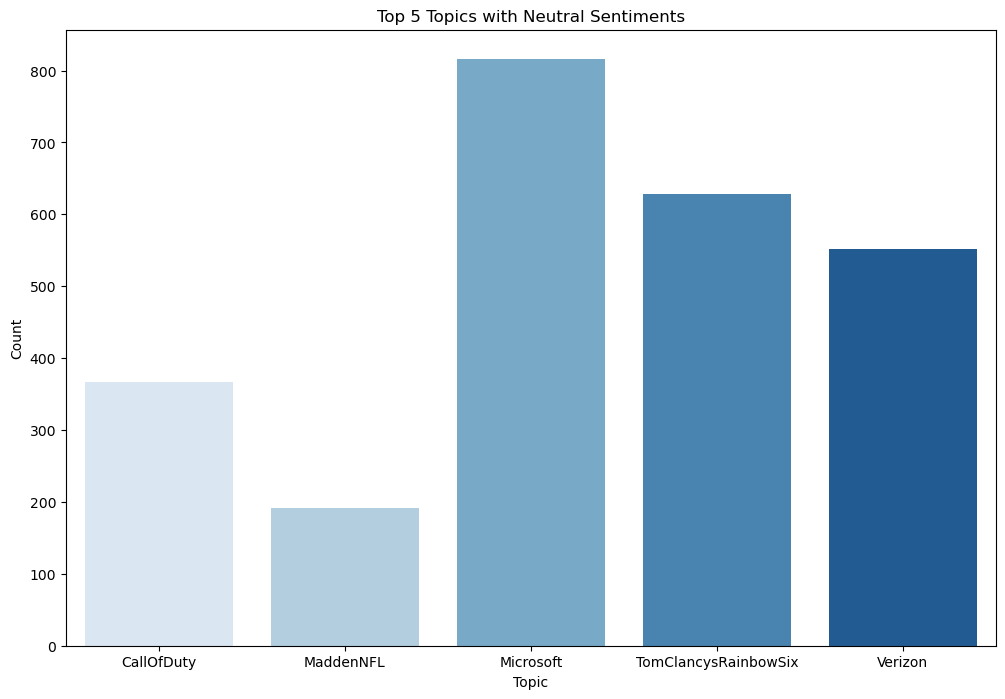

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments');plt.xlabel('Topic');plt.ylabel('Count')
plt.show()

<h2> Top 5 Topics with Irrelevant Sentiments</h2>

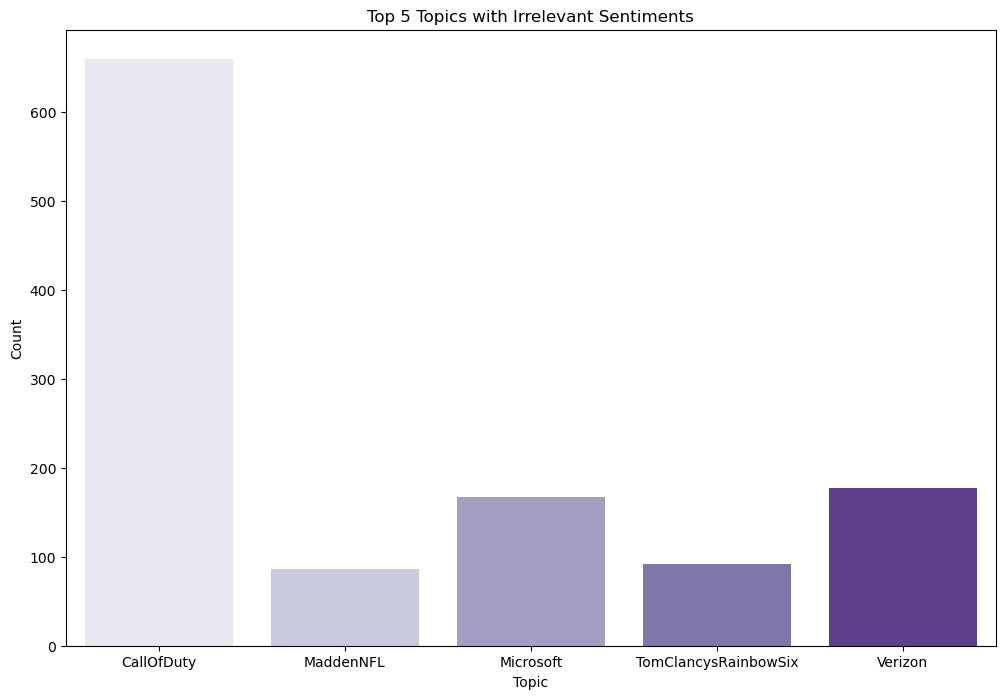

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments');plt.xlabel('Topic');plt.ylabel('Count')
plt.show()

<h2>Sentiment Distribution in Google</h2>

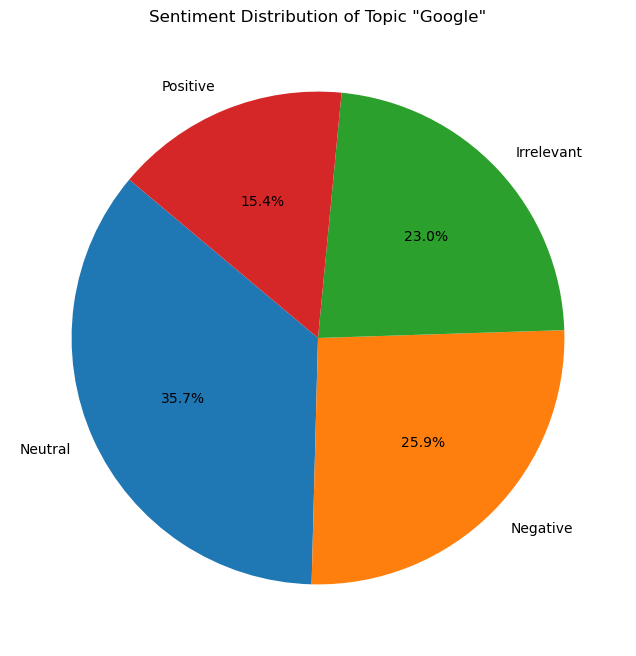

In [15]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = ds[ds['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()


<h2>Sentiment Distribution in Microsoft</h2>

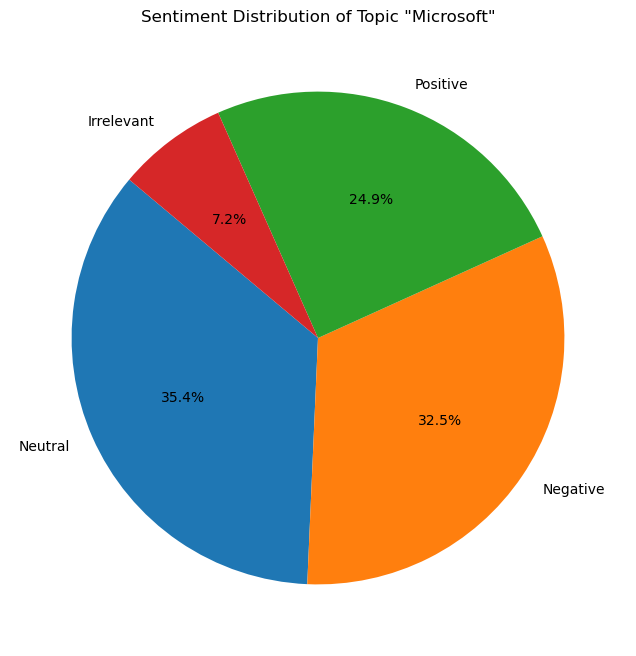

In [16]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = ds[ds['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [17]:
ds['msg_len'] = ds['Text'].apply(len)

<h2>Plot of message length distribution for training data</h2>

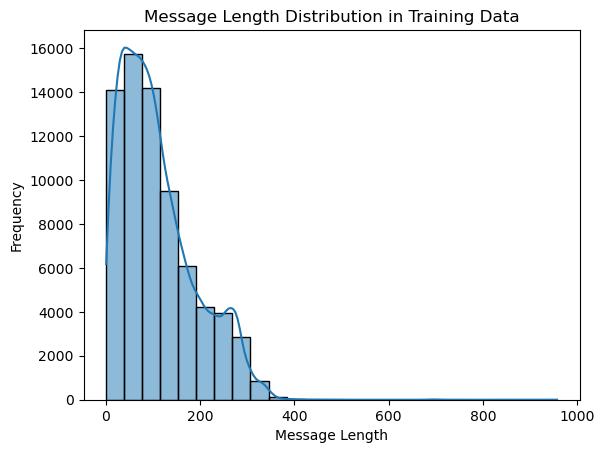

In [18]:
sns.histplot(ds['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency');plt.xlabel('Message Length')
plt.show()

<h2>Plot message length distribution by sentiment for training data </h2>

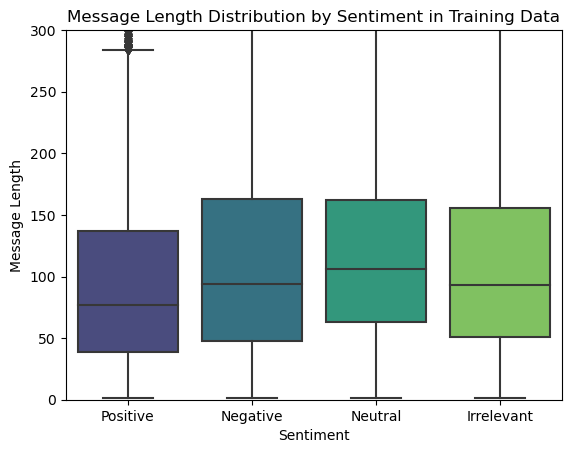

In [19]:
sns.boxplot(data=ds, x=ds['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length');plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show() 

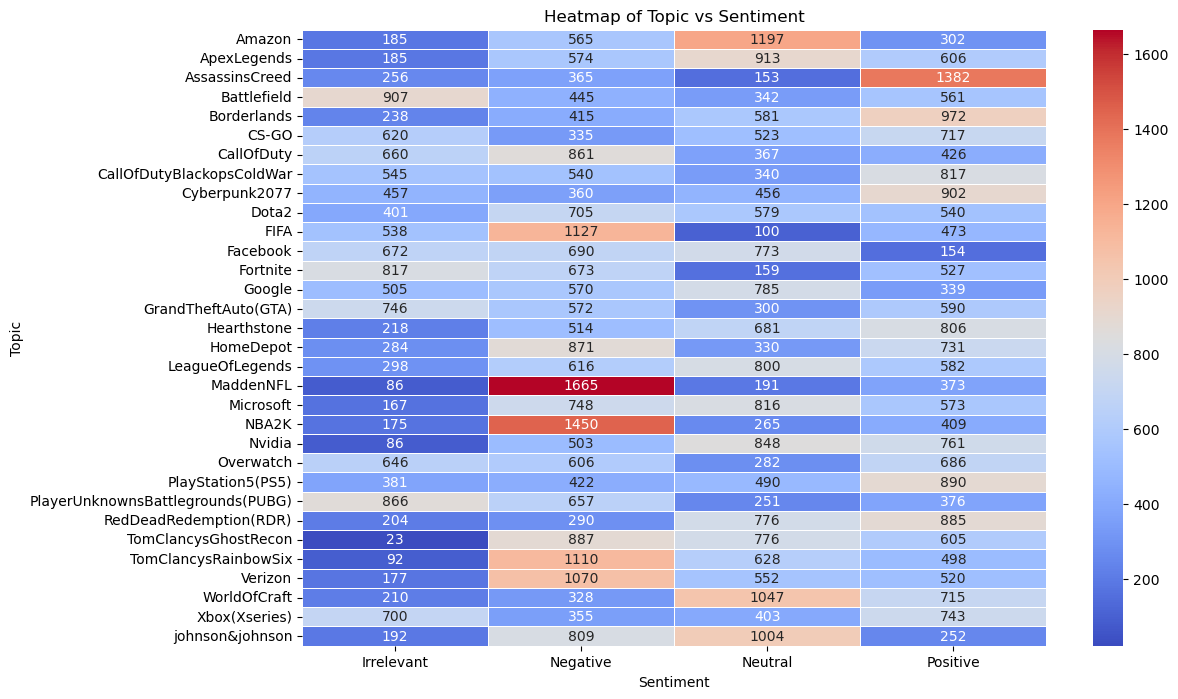

In [20]:
# Create the crosstab
crosstab = pd.crosstab(index=ds['Topic'], columns=ds['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()


<h2> word cloud visualization(Text)</h2>

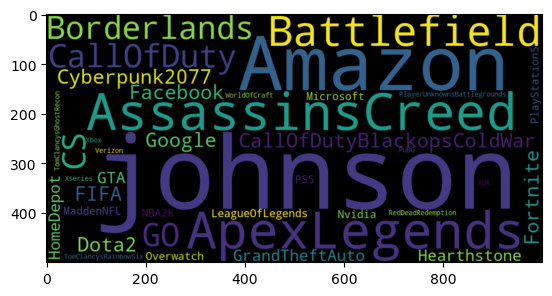

In [21]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

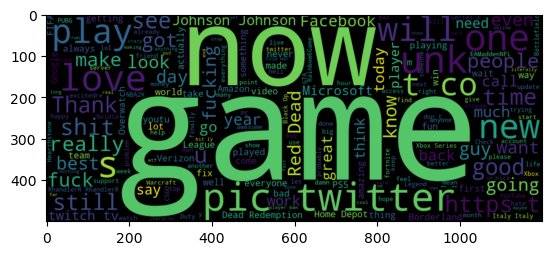

In [22]:
corpus = ' '.join(ds['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')

# `Conclusion:`

Based on the observations from the Twitter sentiment analysis task, several key insights can be drawn:

<h2>Twitter Sentiment Analysis Findings</h2>
<h3>Key Takeaways</h3>
<ul>
    <li>Dominant Topic: "Tom Clancy's Rainbow Six" is the most discussed topic, highlighting significant user engagement.</li>
    <li>Sentiment Breakdown: Negative sentiment leads (30.3%), followed by positive (27.5%) and neutral (24.7%). Interestingly, irrelevant sentiments hold a share (17.5%).</li>
    <li>Topic-Specific Sentiment: Discussions surrounding "Google" and "Microsoft" lean neutral, suggesting a balanced perspective.</li>
    <li>Message Concision: Most messages (under 400 words) demonstrate user preference for concise communication within Twitter's character limit.</li>
</ul>
<h3>Overall</h3>
<p>This sentiment analysis provides valuable insights into public opinion on various topics circulating on Twitter. While negativity appears slightly more prevalent, a diverse range of sentiments exists across different subjects.</p>

